In [101]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [159]:
df = pd.read_csv("Data/final_data.csv")

In [103]:
df.head(10)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,0.000000,0.000000,5854,443,70,4,35000000,42000000,2,1


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [6]:
# Check for missing values
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [87]:
df['current_value'].describe()

count    1.075400e+04
mean     3.622971e+06
std      9.095410e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      3.000000e+06
max      1.800000e+08
Name: current_value, dtype: float64

In [88]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [10]:
#from kaggle 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [11]:
# 2022-2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [12]:
#Until now good just have one dataset

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [13]:
#until now good 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [14]:
df.duplicated

<bound method DataFrame.duplicated of                                           player                      team  \
0             /david-de-gea/profil/spieler/59377         Manchester United   
1            /jack-butland/profil/spieler/128899         Manchester United   
2               /tom-heaton/profil/spieler/34130         Manchester United   
3       /lisandro-martinez/profil/spieler/480762         Manchester United   
4          /raphael-varane/profil/spieler/164770         Manchester United   
...                                          ...                       ...   
10749       /aidan-simmons/profil/spieler/867763  Western Sydney Wanderers   
10750        /kusini-yengi/profil/spieler/708099  Western Sydney Wanderers   
10751    /nathanael-blair/profil/spieler/1023268  Western Sydney Wanderers   
10752    /zachary-sapsford/profil/spieler/703657  Western Sydney Wanderers   
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name

In [15]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [ ]:
#No need because don't have null 

In [16]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [17]:
# Checking data types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [18]:
# go to clean them 

In [19]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [22]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [23]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [24]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



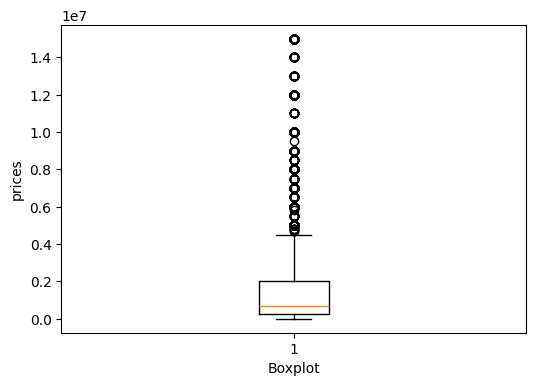

In [119]:
# plt.figure(figsize=(6,4))
# plt.boxplot(df['current_value'])
# plt.xlabel('Boxplot')
# plt.ylabel('prices')
# plt.show()


### AS we can see how much have outlier we need split 

In [113]:
df.shape

(10754, 22)

In [114]:
# df= df[df['current_value']<=25000000]

In [115]:
df.shape

(10473, 22)

In [117]:
# df = df[df['current_value']<=15000000]

In [118]:
df.shape

(10161, 22)

In [121]:
df['team'].unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [125]:
# Lists for each region
america = [
    'Club Athletico Paranaense', 'Red Bull Bragantino', 'Santos FC',
    'Clube de Regatas Vasco da Gama', 'Fluminense Football Club', 'Sport Club Internacional',
    'Esporte Clube Bahia', 'Grêmio Foot-Ball Porto Alegrense', 'Coritiba Foot Ball Club',
    'Fortaleza Esporte Clube', 'Cruzeiro Esporte Clube', 'Goiás Esporte Clube',
    'Cuiabá Esporte Clube (MT)', 'Botafogo de Futebol e Regatas', 'Clube Atlético Mineiro',
    'São Paulo Futebol Clube', 'América Futebol Clube (MG)', 'Sociedade Esportiva Palmeiras',
    'CR Flamengo', 'Sport Club Corinthians Paulista', 'Santos Laguna', 'Club León FC',
    'FC Juárez', 'Club Tijuana', 'Atlético de San Luis', 'Club Necaxa', 'Puebla FC',
    'Mazatlán FC', 'Querétaro FC', 'CF América', 'CF Monterrey', 'Atlas Guadalajara',
    'UNAM Pumas', 'Deportivo Toluca', 'Tigres UANL', 'Deportivo Guadalajara', 'CD Cruz Azul',
    'CF Pachuca', 'Philadelphia Union', 'FC Cincinnati', 'FC Dallas', 'Orlando City SC',
    'Los Angeles Galaxy', 'New England Revolution', 'D.C. United', 'New York Red Bulls',
    'Portland Timbers', 'Columbus Crew', 'Charlotte FC', 'Sporting Kansas City',
    'Colorado Rapids', 'Vancouver Whitecaps FC', 'Chicago Fire FC', 'Inter Miami CF',
    'Minnesota United FC', 'Houston Dynamo FC', 'St. Louis CITY SC', 'CF Montréal',
    'Real Salt Lake City', 'Nashville SC', 'San Jose Earthquakes', 'Seattle Sounders FC',
    'Atlanta United FC', 'New York City FC', 'Austin FC', 'Los Angeles FC', 'Toronto FC',
    'CA Vélez Sarsfield', 'CA San Lorenzo de Almagro', 'Club Atlético Lanús', 'Defensa y Justicia',
    'Club Estudiantes de La Plata', "CA Newell's Old Boys", 'CA Colon', 'CA Rosario Central',
    'CA Banfield', 'Club de Gimnasia y Esgrima La Plata', 'Club Atlético Tucumán',
    'CD Godoy Cruz Antonio Tomba', 'Club Atlético Unión', 'Club Atlético Platense',
    'Instituto AC Córdoba', 'CA Sarmiento (Junin)', 'CA Central Córdoba (SdE)',
    'CA Barracas Central', 'Arsenal Fútbol Club', 'Club Atlético Talleres', 'Club Atlético Belgrano',
    'AA Argentinos Juniors', 'CA Independiente', 'Club Atlético Tigre', 'CA River Plate',
    'CA Boca Juniors', 'CA Huracán', 'Racing Club'
]

asia = [
    'Kawasaki Frontale', 'Yokohama F. Marinos', 'Cerezo Osaka', 'Kyoto Sanga', 'FC Tokyo',
    'Nagoya Grampus', 'Kashiwa Reysol', 'Yokohama FC', 'Avispa Fukuoka', 'Sagan Tosu',
    'Vissel Kobe', 'Hokkaido Consadole Sapporo', 'Shonan Bellmare', 'Albirex Niigata',
    'Kashima Antlers', 'Sanfrecce Hiroshima', 'Urawa Red Diamonds', 'Gamba Osaka',
    'Al-Shabab Club (Riyadh)', 'Ettifaq FC', 'Al-Taawoun FC', 'Al-Wehda FC', 'Damac FC',
    'Al-Tai', 'Al-Fayha FC', 'Abha Club', 'Al-Khaleej', 'Al-Raed SFC', 'Al-Batin FC',
    'Al-Adalah FC', 'Al-Ittihad Club (Jeddah)', 'Al-Fateh SC', 'Al-Hilal Saudi FC', 'Al-Nassr FC',
    'Suwon Samsung Bluewings', 'Jeju United', 'Incheon United', 'Gangwon FC', 'Daejeon Hana Citizen',
    'Gwangju FC', 'Daegu FC', 'Suwon FC', 'Pohang Steelers', 'FC Seoul', 'Jeonbuk Hyundai Motors',
    'Ulsan Hyundai', 'Melbourne Victory', 'Western United FC', 'Newcastle United Jets',
    'Perth Glory', 'Macarthur FC', 'Brisbane Roar', 'Central Coast Mariners', 'Wellington Phoenix',
    'Melbourne City FC', 'Sydney FC', 'Adelaide United', 'Western Sydney Wanderers'
]

africa = [
    'Sekhukhune United FC', 'AmaZulu FC', 'Lamontville Golden Arrows', 'Stellenbosch FC',
    'Swallows FC', 'Maritzburg United FC', 'Royal AM FC', 'TS Galaxy FC', 'Richards Bay FC',
    'Marumo Gallants FC', 'Cape Town City FC', 'Orlando Pirates', 'SuperSport United',
    'Chippa United', 'Mamelodi Sundowns FC', 'Kaizer Chiefs'
]

europe = [
    'Manchester United', 'West Ham United', 'Leicester City', 'Aston Villa', 'Wolverhampton Wanderers',
    'Southampton FC', 'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest', 'Leeds United',
    'Crystal Palace', 'Fulham FC', 'AFC Bournemouth', 'Brentford FC', 'Liverpool FC',
    'Newcastle United', 'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
    'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim', '1.FC Union Berlin',
    'FC Augsburg', 'VfB Stuttgart', '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
    'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt', 'SC Freiburg', 'Borussia Dortmund',
    'Bayer 04 Leverkusen', 'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
    'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF', 'Sevilla FC', 'Celta de Vigo',
    'CA Osasuna', 'Girona FC', 'Rayo Vallecano', 'RCD Mallorca', 'UD Almería', 'Real Valladolid CF',
    'Cádiz CF', 'Elche CF', 'RCD Espanyol Barcelona', 'Getafe CF', 'Atlético de Madrid', 'Real Madrid',
    'FC Barcelona', 'AS Roma', 'SS Lazio', 'ACF Fiorentina', 'US Sassuolo', 'Torino FC', 'Udinese Calcio',
    'Bologna FC 1909', 'AC Monza', 'FC Empoli', 'US Lecce', 'Spezia Calcio', 'Hellas Verona', 'UC Sampdoria',
    'US Cremonese', 'US Salernitana 1919', 'Atalanta BC', 'SSC Napoli', 'Inter Milan', 'AC Milan',
    'Juventus FC', 'AS Monaco', 'Stade Rennais FC', 'Olympique Marseille', 'OGC Nice', 'RC Lens',
    'FC Nantes', 'Montpellier HSC', 'FC Lorient', 'FC Toulouse', 'ESTAC Troyes', 'Stade Brestois 29',
    'Angers SCO', 'AJ Auxerre', 'Clermont Foot 63', 'AC Ajaccio', 'Olympique Lyon', 'LOSC Lille',
    'Stade Reims', 'RC Strasbourg Alsace', 'Paris Saint-Germain', 'AZ Alkmaar', 'Twente Enschede FC',
    'Vitesse Arnhem', 'FC Groningen', 'Fortuna Sittard', 'NEC Nijmegen', 'Sparta Rotterdam',
    'SC Cambuur Leeuwarden', 'Excelsior Rotterdam', 'FC Volendam', 'RKC Waalwijk', 'FC Emmen',
    'Go Ahead Eagles', 'FC Utrecht', 'SC Heerenveen', 'Ajax Amsterdam', 'PSV Eindhoven',
    'Feyenoord Rotterdam', 'SC Braga', 'FC Famalicão', 'Vitória Guimarães SC', 'CD Santa Clara',
    'GD Estoril Praia', 'Boavista FC', 'Portimonense SC', 'CS Marítimo', 'Casa Pia AC', 'FC Paços de Ferreira',
    'FC Arouca', 'FC Vizela', 'Rio Ave FC', 'GD Chaves', 'Gil Vicente FC', 'FC Porto', 'Sporting CP',
    'SL Benfica', 'Dynamo Moscow', 'Lokomotiv Moscow', 'FK Rostov', 'Krylya Sovetov Samara', 'FC Sochi',
    'Akhmat Grozny', 'Ural Yekaterinburg', 'FK Orenburg', 'FC Pari Nizhniy Novgorod', 'FK Khimki',
    'Torpedo Moscow', 'Fakel Voronezh', 'Spartak Moscow', 'CSKA Moscow', 'FK Krasnodar', 'Zenit St. Petersburg',
    'West Bromwich Albion', 'Sunderland AFC', 'Hull City', 'Preston North End', 'Stoke City', 'Queens Park Rangers',
    'Birmingham City', 'Cardiff City', 'Millwall FC', 'Reading FC', 'Blackpool FC', 'Bristol City',
    'Huddersfield Town', 'Rotherham United', 'Wigan Athletic', 'Middlesbrough FC', 'Coventry City', 'Luton Town',
    'Swansea City', 'Burnley FC', 'Watford FC', 'Sheffield United', 'Blackburn Rovers', 'Norwich City', 'Trabzonspor',
    'Besiktas JK', 'Basaksehir FK', 'Antalyaspor', 'Adana Demirspor', 'Alanyaspor', 'Kasimpasa', 'Konyaspor',
    'MKE Ankaragücü', 'Sivasspor', 'Kayserispor', 'Giresunspor', 'Istanbulspor', 'Hatayspor', 'Gaziantep FK',
    'Fatih Karagümrük', 'Ümraniyespor', 'Fenerbahce', 'Galatasaray', 'SK Sturm Graz', 'LASK', 'SCR Altach',
    'SC Austria Lustenau', 'SV Ried', 'TSV Hartberg', 'WSG Tirol', 'Rapid Vienna', 'Austria Vienna',
    'SK Austria Klagenfurt', 'Wolfsberger AC', 'Red Bull Salzburg'
]

# Printing the lists
print("America:", len(america),'club')
print("Asia:", len(asia),'club')
print("Africa:", len(africa),'club')
print("Europe:", len(europe),'club')


America: 95 club
Asia: 58 club
Africa: 16 club
Europe: 205 club


In [162]:
dfAmerica = df[df['team'].isin(africa)]

In [163]:
dfasia = df[df['team'].isin(asia)]

In [164]:
dfAfrica = df[df['team'].isin(america)]

In [165]:
dfEurope = df[df['team'].isin(europe)]

In [140]:
dfasia.shape

(1926, 22)

In [141]:
dfAfrica.shape

(2724, 22)

In [166]:
dfEurope.shape

(5537, 22)

In [144]:
dfasia.shape

(1926, 22)

### Let's take a look at the outliers in each region now 

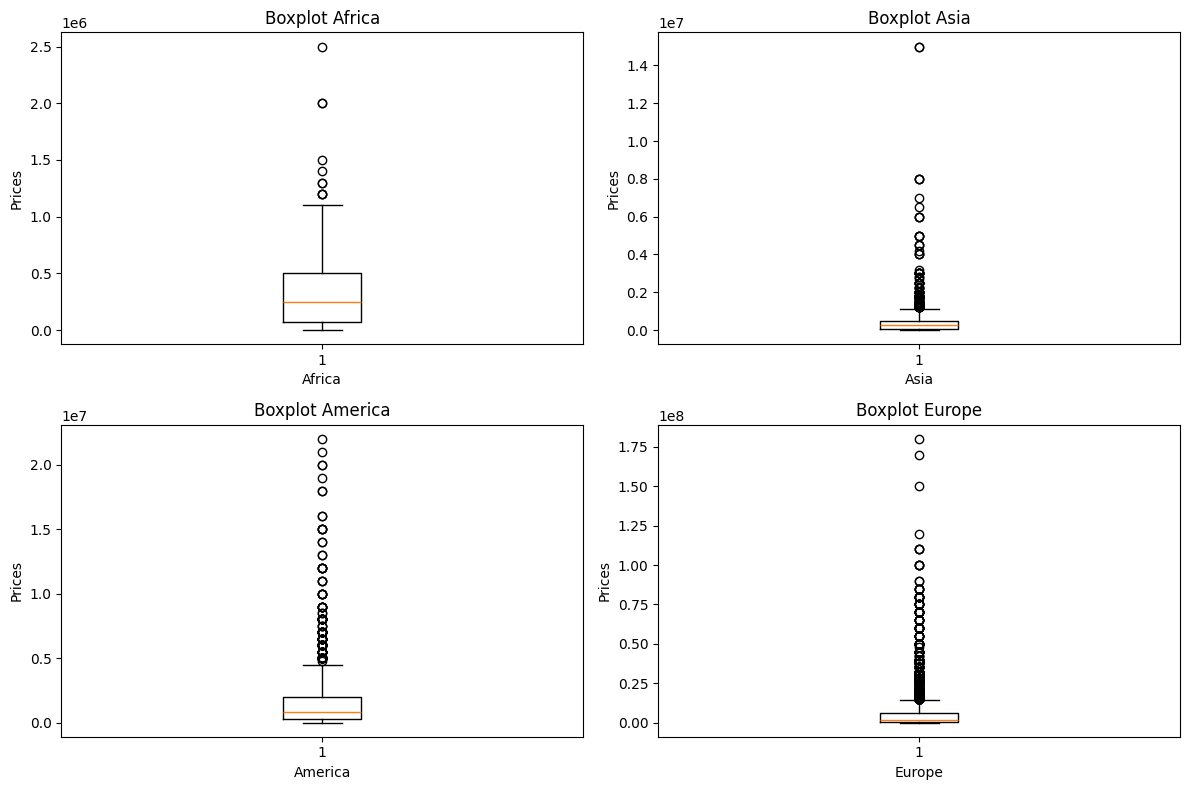

In [49]:
import matplotlib.pyplot as plt

# Create a figure with a size of 10x10 inches
plt.figure(figsize=(12, 8))

# First subplot: Boxplot for Africa
plt.subplot(2, 2, 1)
plt.boxplot(afr['current_value'])
plt.xlabel('Africa')
plt.ylabel('Prices')
plt.title('Boxplot Africa')

# Second subplot: Boxplot for Asia
plt.subplot(2, 2, 2)
plt.boxplot(asia['current_value'])
plt.xlabel('Asia')
plt.ylabel('Prices')
plt.title('Boxplot Asia')

# Third subplot: Boxplot for America
plt.subplot(2, 2, 3)
plt.boxplot(amr['current_value'])
plt.xlabel('America')
plt.ylabel('Prices')
plt.title('Boxplot America')

# Fourth subplot: Boxplot for Europe
plt.subplot(2, 2, 4)
plt.boxplot(eur['current_value'])
plt.xlabel('Europe')
plt.ylabel('Prices')
plt.title('Boxplot Europe')

# Show the plots
plt.tight_layout()
plt.show()


### Now, the outliers are clearly visible
### Review the statistics for each one below: *

In [146]:
dfAfrica['current_value'].describe()

count    2.724000e+03
mean     1.485883e+06
std      1.873611e+06
min      0.000000e+00
25%      3.000000e+05
50%      8.000000e+05
75%      2.000000e+06
max      1.500000e+07
Name: current_value, dtype: float64

In [148]:
dfasia['current_value'].describe()

count    1.926000e+03
mean     4.457217e+05
std      8.289524e+05
min      0.000000e+00
25%      7.500000e+04
50%      2.750000e+05
75%      5.000000e+05
max      1.500000e+07
Name: current_value, dtype: float64

Text(0.5, 1.0, 'Eruop')

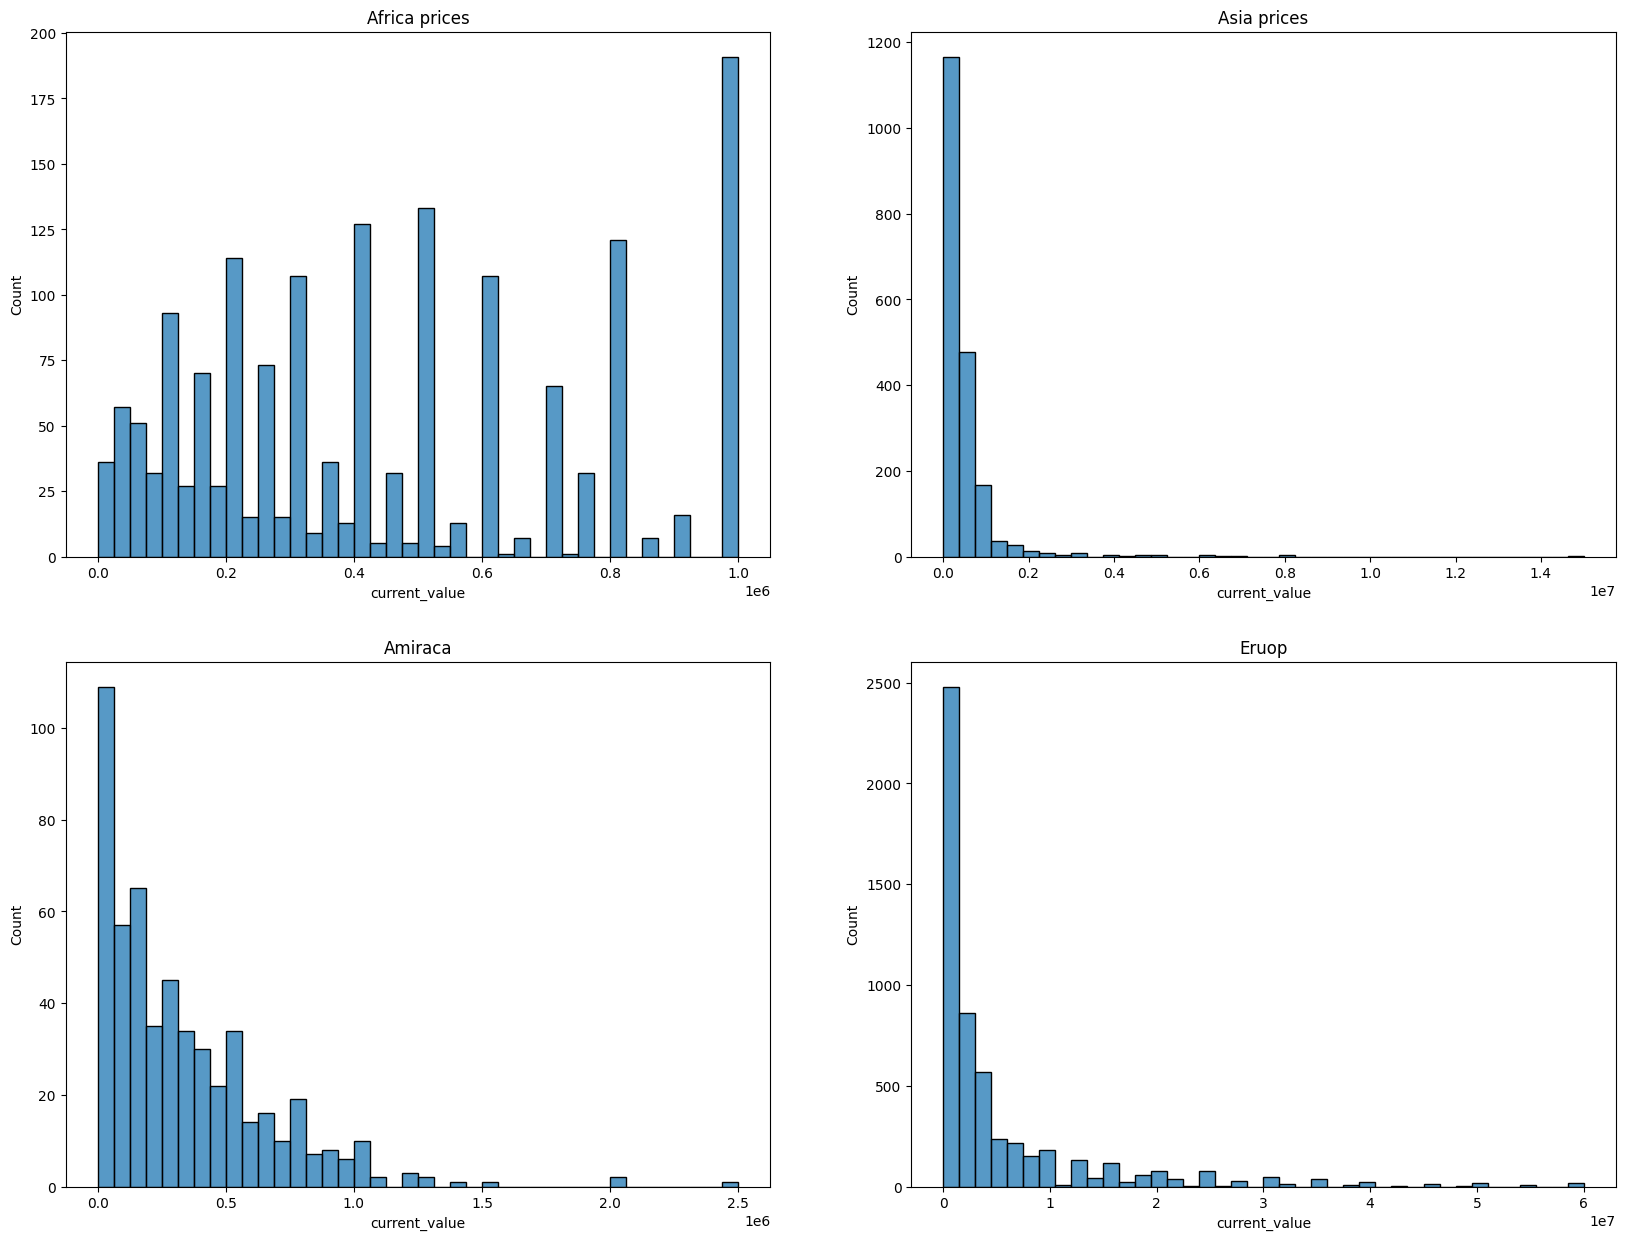

In [176]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.histplot(data=dfAfrica['current_value'], bins=40, ax=ax[0, 0])
ax[0, 0].set_title('Africa prices')
sns.histplot(data=dfasia['current_value'], bins=40, ax=ax[0, 1])
ax[0, 1].set_title('Asia prices')
sns.histplot(data=dfAmerica['current_value'], bins=40, ax=ax[1, 0])
ax[1, 0].set_title('Amiraca')
sns.histplot(data=dfEurope['current_value'], bins=40, ax=ax[1, 1])
ax[1, 1].set_title('Eruop')

In [168]:
dfAfrica=dfAfrica[dfAfrica['current_value']<=1000000]
dfAfrica.shape

(1642, 22)

In [185]:
dfasia=dfasia[dfasia['current_value']<=1400000]
dfasia.shape

(1846, 22)

In [155]:
dfAmerica=dfAmerica[dfAmerica['current_value']<=1500000]
dfAmerica.shape

(530, 22)

In [175]:
dfEurope=dfEurope[dfEurope['current_value']<=60000000]
dfEurope.shape

(5480, 22)

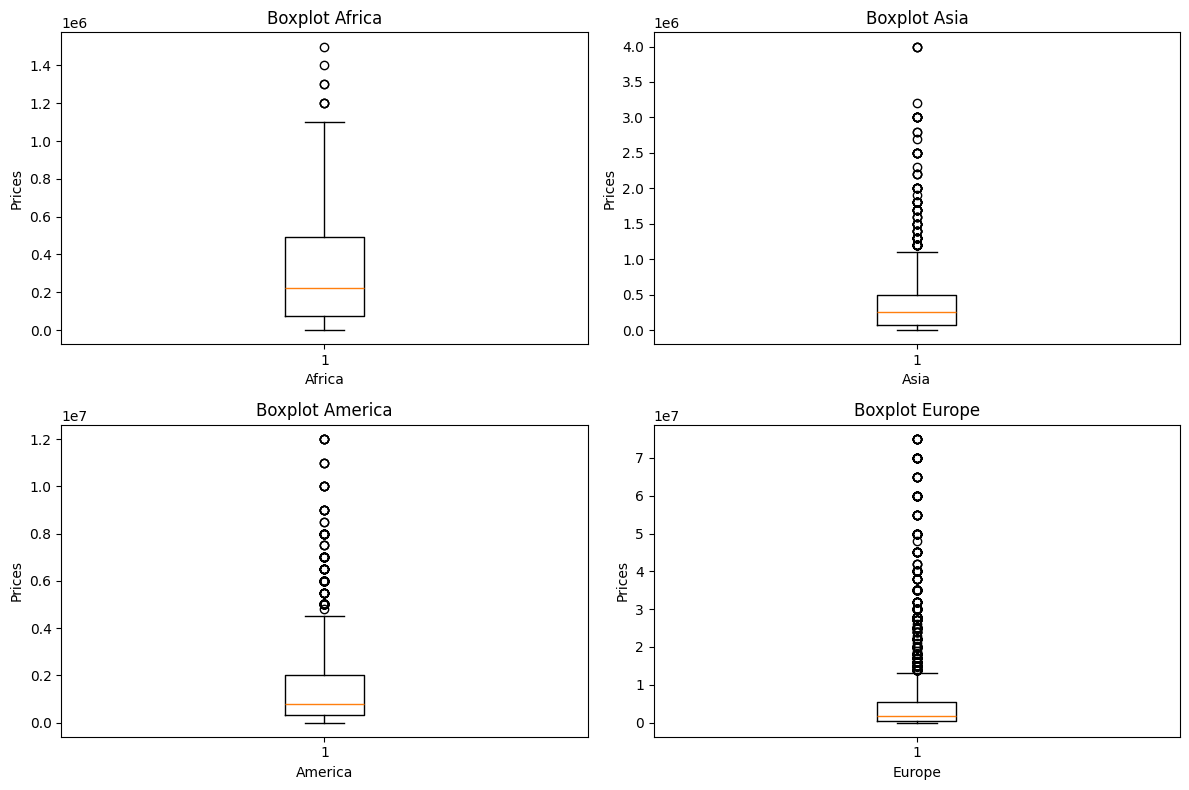

In [57]:
import matplotlib.pyplot as plt

# Create a figure with a size of 10x10 inches
plt.figure(figsize=(12, 8))

# First subplot: Boxplot for Africa
plt.subplot(2, 2, 1)
plt.boxplot(afr['current_value'])
plt.xlabel('Africa')
plt.ylabel('Prices')
plt.title('Boxplot Africa')

# Second subplot: Boxplot for Asia
plt.subplot(2, 2, 2)
plt.boxplot(asia['current_value'])
plt.xlabel('Asia')
plt.ylabel('Prices')
plt.title('Boxplot Asia')

# Third subplot: Boxplot for America
plt.subplot(2, 2, 3)
plt.boxplot(amr['current_value'])
plt.xlabel('America')
plt.ylabel('Prices')
plt.title('Boxplot America')

# Fourth subplot: Boxplot for Europe
plt.subplot(2, 2, 4)
plt.boxplot(eur['current_value'])
plt.xlabel('Europe')
plt.ylabel('Prices')
plt.title('Boxplot Europe')

# Show the plots
plt.tight_layout()
plt.show()


In [206]:
from sklearn.model_selection import train_test_split
x = dfasia[['age','minutes played']]
y= dfasia['current_value'] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)


In [207]:
from sklearn.linear_model import LinearRegression
asi = LinearRegression()
asi.fit(X_train,y_train)


LinearRegression()

In [205]:
coeff = pd.DataFrame(asi.coef_,columns=['Coefficient'])
coeff


,Coefficient
0,15632.091378
1,67.947570


In [203]:
print( 'intersepts= ' , asi.intercept_)

intersepts=  -153797.12043477508


In [200]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = asi.predict(X_test)
mse_train = mean_squared_error(y_train, asi.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, asi.predict(X_train))
ae_train = mean_absolute_error(y_train, asi.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute  Error of base model: 237289.68045511955
Mean Absolute Error for training: 206107.07862710225
Mean Absolute Error for testing: 206351.50437140642


C:\Users\user\AppData\Local\Temp\ipykernel_9748\2465770726.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


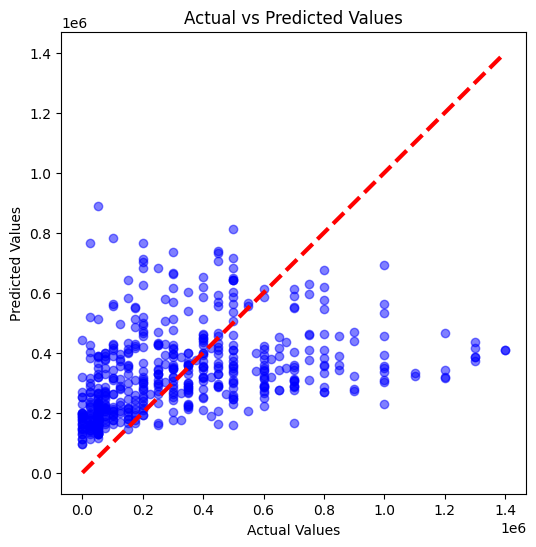

In [201]:
y_pred = asi.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [208]:
from sklearn.model_selection import train_test_split
x = dfAfrica[['age','minutes played']]
y= dfAfrica['current_value']

X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=50)
from sklearn.linear_model import LinearRegression
af = LinearRegression()
af.fit(X_train,y_train)


LinearRegression()

In [209]:
coeff = pd.DataFrame(af.coef_,columns=['Coefficient'])
coeff
print( 'intersepts= ', af.intercept_)

intersepts=  191033.9027858228


In [210]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = af.predict(X_test)
mse_train = mean_squared_error(y_train, af.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, af.predict(X_train))
ae_train = mean_absolute_error(y_train, af.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute  Error of base model: 255866.86191537927
Mean Absolute Error for training: 244509.4794264068
Mean Absolute Error for testing: 237311.97028741127


Module 2

In [214]:
from sklearn.model_selection import train_test_split
x = dfAmerica[['age','minutes played']]
y= dfAmerica['current_value']
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
from sklearn.linear_model import LinearRegression
am = LinearRegression()
am.fit(X_train,y_train)

LinearRegression()

In [217]:
from sklearn.model_selection import train_test_split
x = dfAmerica[['age','minutes played']]
y= dfAmerica['current_value']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())

# # Drop rows with any missing values
# x = x.dropna()
# y = y.loc[x.index] 
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.3, random_state=100)
from sklearn.linear_model import LinearRegression
am = LinearRegression()
am.fit(X_train,y_train)

Missing values in features: age               0
minutes played    0
dtype: int64
Missing values in target: 0


LinearRegression()

In [218]:
coeff = pd.DataFrame(am.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,-21331.930622
1,141.220182


In [219]:
print( 'intersepts= ' , am.intercept_)

intersepts=  642579.7466589655


In [220]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_base = [y_train.mean()] * len(y_test)
mse_base = mean_absolute_error(y_test, y_base )
y_pred = am.predict(X_test)
mse_train = mean_squared_error(y_train, am.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)
mae_train = mean_absolute_error(y_train, am.predict(X_train))
ae_train = mean_absolute_error(y_train, am.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute  Error of base model: {mse_base}')
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute  Error of base model: 256689.84584450405
Mean Absolute Error for training: 158280.28740476858
Mean Absolute Error for testing: 179104.58984879995


Model 3 

In [221]:
from sklearn.model_selection import train_test_split
x = dfEurope[['age','minutes played']]
y= dfEurope['current_value']
print("Missing values in features:", x.isnull().sum())
print("Missing values in target:", y.isnull().sum())
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size= 0.4, random_state=500)
from sklearn.linear_model import LinearRegression
eu = LinearRegression()
eu.fit(X_train,y_train)

Missing values in features: age               0
minutes played    0
dtype: int64
Missing values in target: 0


LinearRegression()

In [222]:
coeff = pd.DataFrame(eu.coef_,columns=['Coefficient'])
coeff

,Coefficient
0,-254089.120665
1,2087.877427


In [ ]:
print( 'intersepts= ' , eu.intercept_)

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.